In [1]:
# Data Handling & Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Display settings
pd.set_option('display.max_columns', None)


In [4]:
# Load the dataset
df = pd.read_csv("C:\\Users\\ASEEL\\hope\\Battery_RUL.csv")

# Display shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

# Show first 5 rows
print("Preview of the dataset:")
display(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Basic statistics
print("\nStatistical Summary:")
display(df.describe())

Dataset contains 15064 rows and 9 columns.

Preview of the dataset:


,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107



Missing values in each column:
Cycle_Index                  0
Discharge Time (s)           0
Decrement 3.6-3.4V (s)       0
Max. Voltage Dischar. (V)    0
Min. Voltage Charg. (V)      0
Time at 4.15V (s)            0
Time constant current (s)    0
Charging time (s)            0
RUL                          0
dtype: int64

Statistical Summary:


,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


In [5]:
# ================================
# 🔹 Step 3: Data Preprocessing
# ================================

# Display the column names
print("📋 Available Columns:")
print(df.columns.tolist())

# Target variable
target_column = "RUL"

# Features — drop target column
X = df.drop(columns=[target_column])
y = df[target_column]

# Print feature info
print(f"\n🧪 Feature matrix shape: {X.shape}")
print(f"🎯 Target variable shape: {y.shape}")

# ------------------------------
# Scaling the feature data
# ------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Show first 5 scaled values
print("\n🔧 First 5 scaled feature rows:")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

# ------------------------------
# Train-Test Split (80/20)
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"\n✅ Training set: {X_train.shape[0]} samples")
print(f"✅ Test set: {X_test.shape[0]} samples")


📋 Available Columns:
['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)', 'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)', 'RUL']

🧪 Feature matrix shape: (15064, 8)
🎯 Target variable shape: (15064,)

🔧 First 5 scaled feature rows:
   Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
0    -1.722117           -0.059922               -0.005871   
1    -1.719015            0.085308               -0.004473   
2    -1.715913            0.084859               -0.008431   
3    -1.712811            0.084610               -0.010603   
4    -1.706607            1.823662                1.899962   

   Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
0                  -2.617313                -2.966302           0.185302   
1                   3.712333                -2.893540           0.190668   
2                   3.745300                -2.861201           0.190668   
3 

In [6]:
# =================================================
# 🔹 Step 4: Feature Extraction / Engineering
# =================================================

# Create a copy of the dataframe to avoid modifying original
df_feat = df.copy()

# 1️⃣ Charge to Discharge Time Ratio
df_feat["Charge_Discharge_Ratio"] = df_feat["Charging time (s)"] / (df_feat["Discharge Time (s)"] + 1e-5)

# 2️⃣ Voltage Range (Max - Min)
df_feat["Voltage_Gap"] = df_feat["Max. Voltage Dischar. (V)"] - df_feat["Min. Voltage Charg. (V)"]

# 3️⃣ Constant Current Efficiency
df_feat["Const_Current_Efficiency"] = df_feat["Time constant current (s)"] / (df_feat["Charging time (s)"] + 1e-5)

# Show new features
print("✅ New features added:")
print(["Charge_Discharge_Ratio", "Voltage_Gap", "Const_Current_Efficiency"])

# Updated features and target
X = df_feat.drop(columns=["RUL"])
y = df_feat["RUL"]

# Re-scale with StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Re-split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Confirm updated shape
print(f"\n🧪 Updated Feature matrix shape: {X.shape}")
print(f"🎯 Target shape: {y.shape}")


✅ New features added:
['Charge_Discharge_Ratio', 'Voltage_Gap', 'Const_Current_Efficiency']

🧪 Updated Feature matrix shape: (15064, 11)
🎯 Target shape: (15064,)


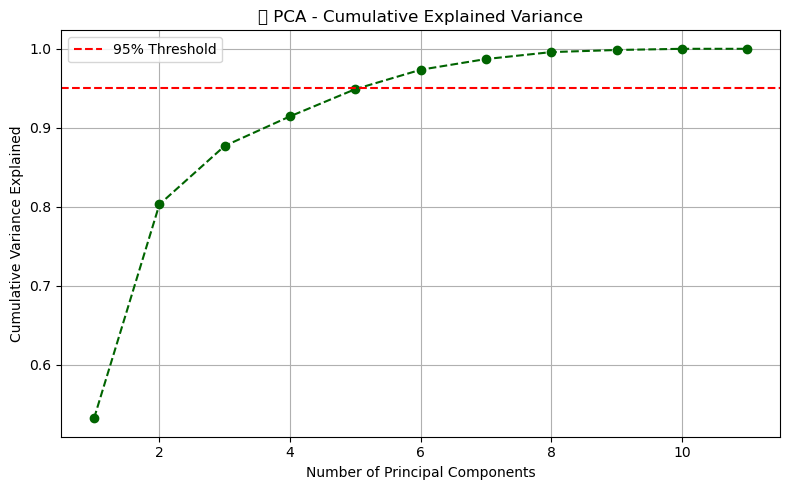


✅ Number of components explaining 95% variance: 6

📉 Reduced feature shape: (15064, 6)


In [7]:
# ===============================================
# 🔹 Step 6: Feature Reduction via PCA
# ===============================================

from sklearn.decomposition import PCA

# Apply PCA after scaling
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_var = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o', linestyle='--', color='darkgreen')
plt.title("🧮 PCA - Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Threshold")
plt.legend()
plt.tight_layout()
plt.show()

# Choose number of components that explain ~95% variance
n_components = np.argmax(explained_var >= 0.95) + 1
print(f"\n✅ Number of components explaining 95% variance: {n_components}")

# Reducing the data using selected number of components
pca_final = PCA(n_components=n_components)
X_reduced = pca_final.fit_transform(X_scaled)

# Re-split the reduced data
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

print(f"\n📉 Reduced feature shape: {X_reduced.shape}")


📈 XGBoost Performance:
✅ RMSE: 20.65
✅ MAE : 6.93
✅ R² Score: 0.9959


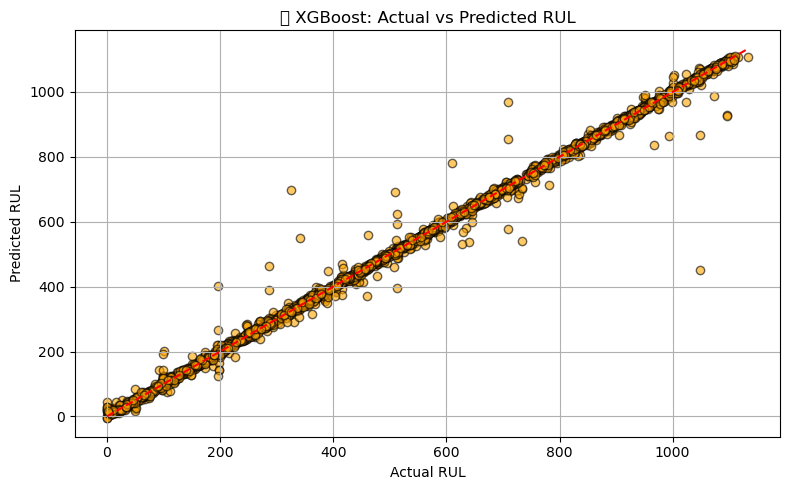

In [8]:
# ===================================================
# 🔹 Step 7: XGBoost Regressor (on PCA-reduced data)
# ===================================================

from xgboost import XGBRegressor

# Initialize XGBoost model
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

# Train model
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Display metrics
print("📈 XGBoost Performance:")
print(f"✅ RMSE: {rmse_xgb:.2f}")
print(f"✅ MAE : {mae_xgb:.2f}")
print(f"✅ R² Score: {r2_xgb:.4f}")

# Plot: Actual vs Predicted
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_xgb, color='orange', edgecolors='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("🎯 XGBoost: Actual vs Predicted RUL")
plt.grid(True)
plt.tight_layout()
plt.show()


📊 Random Forest Performance:
✅ RMSE: 21.34
✅ MAE : 9.57
✅ R² Score: 0.9956


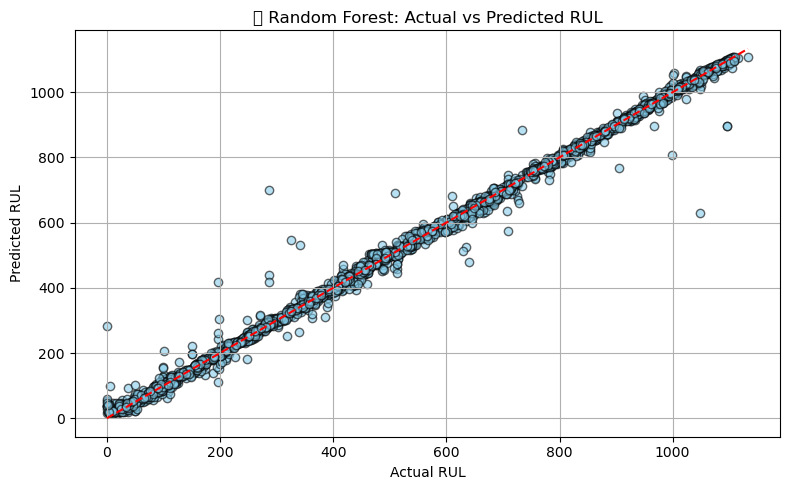

In [9]:
# ===================================================
# 🔹 Step 8: Random Forest Regressor
# ===================================================

from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=4,
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display metrics
print("📊 Random Forest Performance:")
print(f"✅ RMSE: {rmse_rf:.2f}")
print(f"✅ MAE : {mae_rf:.2f}")
print(f"✅ R² Score: {r2_rf:.4f}")

# Plot: Actual vs Predicted
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf, color='skyblue', edgecolors='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("🎯 Random Forest: Actual vs Predicted RUL")
plt.grid(True)
plt.tight_layout()
plt.show()

📈 LightGBM Performance:
✅ RMSE: 19.03
✅ MAE : 7.68
✅ R² Score: 0.9965


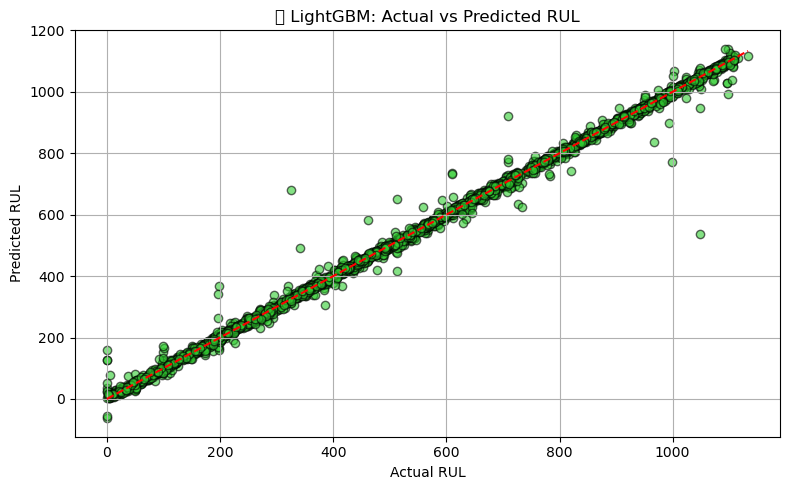

In [10]:
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set model parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1,
    'random_state': 42
}

# Train the model using lgb.train() without early stopping and verbose_eval
lgb_model = lgb.train(
    params,
    train_data,
    num_boost_round=500,  # Full number of boosting rounds
    valid_sets=[train_data, test_data],  # Ensure both datasets are properly defined
    valid_names=['train', 'test']  # Names for the valid sets
)

# Predict using the best iteration from training
y_pred_lgb = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

# Evaluate the performance
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

# Display metrics
print("📈 LightGBM Performance:")
print(f"✅ RMSE: {rmse_lgb:.2f}")
print(f"✅ MAE : {mae_lgb:.2f}")
print(f"✅ R² Score: {r2_lgb:.4f}")

# Plot: Actual vs Predicted
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lgb, color='limegreen', edgecolors='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("🎯 LightGBM: Actual vs Predicted RUL")
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 1/50
377/377 [==============================] - 7s 7ms/step - loss: 407599.5938 - val_loss: 389434.0625
Epoch 2/50
377/377 [==============================] - 2s 5ms/step - loss: 387776.3438 - val_loss: 369981.6562
Epoch 3/50
377/377 [==============================] - 2s 5ms/step - loss: 369164.5625 - val_loss: 352581.9062
Epoch 4/50
377/377 [==============================] - 2s 6ms/step - loss: 351755.7188 - val_loss: 335577.7188
Epoch 5/50
377/377 [==============================] - 2s 6ms/step - loss: 334169.8750 - val_loss: 317725.7812
Epoch 6/50
377/377 [==============================] - 2s 5ms/step - loss: 316404.1562 - val_loss: 300658.5000
Epoch 7/50
377/377 [==============================] - 2s 5ms/step - loss: 300213.1562 - val_loss: 285741.5938
Epoch 8/50
377/377 [==============================] - 2s 5ms/step - loss: 285753.1562 - val_loss: 272300.4062
Epoch 9/50
377/377 [==============================] - 2s 5ms/step - loss: 272755.8750 - val_loss: 259884.3594
Epoch 10/5

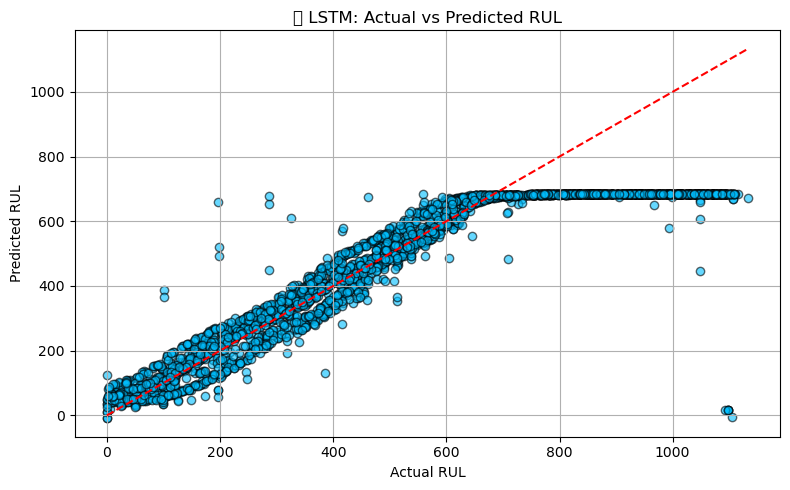

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Step 1: Preprocess the data
# Reshape data into 3D array: (samples, time steps, features)
def reshape_for_lstm(X):
    X = np.array(X)
    # Assuming you are using univariate time-series data, here we just add 1 as time steps
    X = np.reshape(X, (X.shape[0], 1, X.shape[1]))  # (samples, time steps, features)
    return X

X_train_lstm = reshape_for_lstm(X_train)
X_test_lstm = reshape_for_lstm(X_test)

# Step 2: Define and build the LSTM model
model = Sequential()

# Add LSTM layer with dropout for regularization
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 3: Train the model
history = model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

# Step 4: Make predictions
y_pred_lstm = model.predict(X_test_lstm)

# Step 5: Evaluate performance
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

# Display metrics
print("📈 LSTM Performance:")
print(f"✅ RMSE: {rmse_lstm:.2f}")
print(f"✅ MAE : {mae_lstm:.2f}")
print(f"✅ R² Score: {r2_lstm:.4f}")

# Step 6: Plot: Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lstm, color='deepskyblue', edgecolors='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("🎯 LSTM: Actual vs Predicted RUL")
plt.grid(True)
plt.tight_layout()
plt.show()


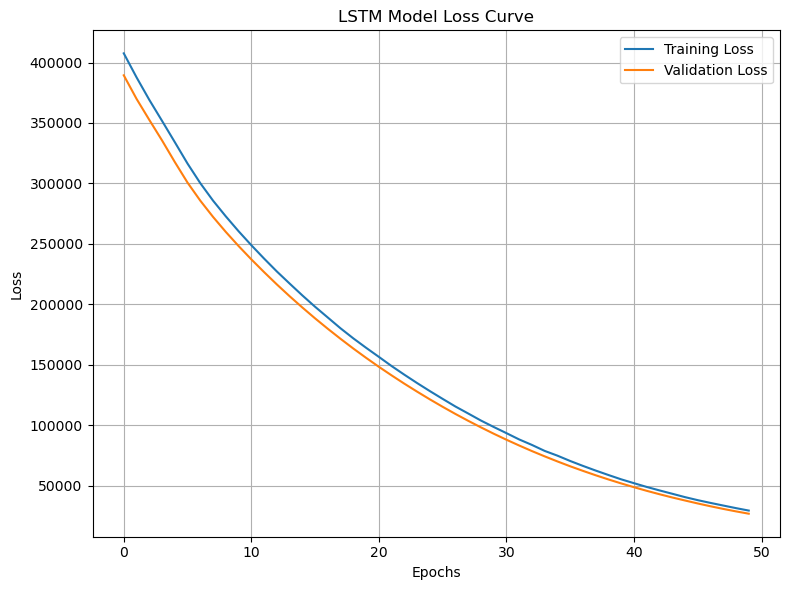

In [12]:
# Plot training & validation loss during training
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
# Calculate the key performance metrics
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

# Display metrics
print("📈 LSTM Performance:")
print(f"✅ RMSE: {rmse_lstm:.2f}")
print(f"✅ MAE : {mae_lstm:.2f}")
print(f"✅ R² Score: {r2_lstm:.4f}")


📈 LSTM Performance:
✅ RMSE: 163.76
✅ MAE : 105.77
✅ R² Score: 0.7411


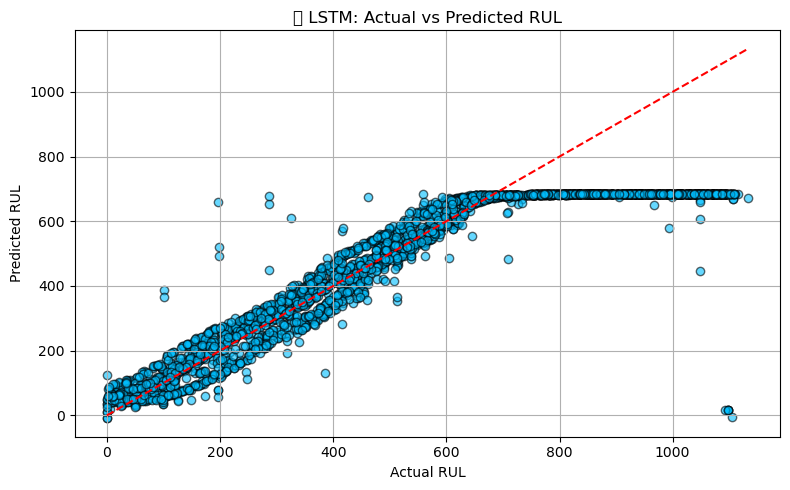

In [14]:
# Plot Actual vs Predicted RUL
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lstm, color='deepskyblue', edgecolors='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("🎯 LSTM: Actual vs Predicted RUL")
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
# Performance Summary
print("Model Performance Summary:")
print("---------------------------------------------------")
print(f"RMSE: {rmse_lstm:.2f}")
print(f"MAE: {mae_lstm:.2f}")
print(f"R² Score: {r2_lstm:.4f}")
print("---------------------------------------------------")


Model Performance Summary:
---------------------------------------------------
RMSE: 163.76
MAE: 105.77
R² Score: 0.7411
---------------------------------------------------


Epoch 1/500
377/377 [==============================] - 5s 6ms/step - loss: 408130.8750 - val_loss: 387407.0938
Epoch 2/500
377/377 [==============================] - 2s 4ms/step - loss: 369023.6875 - val_loss: 327751.9688
Epoch 3/500
377/377 [==============================] - 1s 4ms/step - loss: 296399.6562 - val_loss: 249786.2031
Epoch 4/500
377/377 [==============================] - 1s 4ms/step - loss: 216437.1562 - val_loss: 173460.5000
Epoch 5/500
377/377 [==============================] - 1s 4ms/step - loss: 141199.0469 - val_loss: 101810.9453
Epoch 6/500
377/377 [==============================] - 2s 4ms/step - loss: 72556.1250 - val_loss: 44427.4180
Epoch 7/500
377/377 [==============================] - 2s 4ms/step - loss: 34691.8789 - val_loss: 24303.8086
Epoch 8/500
377/377 [==============================] - 2s 4ms/step - loss: 23194.3750 - val_loss: 17220.6738
Epoch 9/500
377/377 [==============================] - 2s 4ms/step - loss: 18617.1035 - val_loss: 13509.4434
Epoch 10/

377/377 [==============================] - 2s 4ms/step - loss: 5603.1479 - val_loss: 1969.2017
Epoch 77/500
377/377 [==============================] - 2s 5ms/step - loss: 5697.6538 - val_loss: 1968.1346
Epoch 78/500
377/377 [==============================] - 2s 5ms/step - loss: 5529.9512 - val_loss: 1904.0094
Epoch 79/500
377/377 [==============================] - 2s 5ms/step - loss: 5543.1089 - val_loss: 1870.1080
Epoch 80/500
377/377 [==============================] - 2s 5ms/step - loss: 5469.5024 - val_loss: 1863.2716
Epoch 81/500
377/377 [==============================] - 2s 5ms/step - loss: 5401.1470 - val_loss: 1762.0120
Epoch 82/500
377/377 [==============================] - 2s 4ms/step - loss: 5423.3848 - val_loss: 1775.9084
Epoch 83/500
377/377 [==============================] - 2s 4ms/step - loss: 5716.8687 - val_loss: 1776.0602
Epoch 84/500
377/377 [==============================] - 2s 5ms/step - loss: 5195.6050 - val_loss: 1809.5624
Epoch 85/500
377/377 [===================

377/377 [==============================] - 2s 5ms/step - loss: 4623.3223 - val_loss: 892.6036
Epoch 152/500
377/377 [==============================] - 2s 5ms/step - loss: 4594.5728 - val_loss: 892.6643
Epoch 153/500
377/377 [==============================] - 2s 5ms/step - loss: 4532.7041 - val_loss: 843.0283
Epoch 154/500
377/377 [==============================] - 2s 6ms/step - loss: 4733.7949 - val_loss: 834.6154
Epoch 155/500
377/377 [==============================] - 2s 5ms/step - loss: 4598.9814 - val_loss: 840.8028
Epoch 156/500
377/377 [==============================] - 2s 5ms/step - loss: 4477.9170 - val_loss: 830.7906
Epoch 157/500
377/377 [==============================] - 2s 5ms/step - loss: 4353.8530 - val_loss: 833.9532
Epoch 158/500
377/377 [==============================] - 2s 5ms/step - loss: 4489.5015 - val_loss: 836.3195
Epoch 159/500
377/377 [==============================] - 2s 5ms/step - loss: 4396.9263 - val_loss: 797.9827
Epoch 160/500
377/377 [===================

Epoch 227/500
377/377 [==============================] - 2s 6ms/step - loss: 4080.4863 - val_loss: 790.1871
Epoch 228/500
377/377 [==============================] - 2s 5ms/step - loss: 4259.1055 - val_loss: 784.9102
Epoch 229/500
377/377 [==============================] - 2s 5ms/step - loss: 4130.6021 - val_loss: 781.9929
Epoch 230/500
377/377 [==============================] - 2s 5ms/step - loss: 3979.9326 - val_loss: 784.9077
Epoch 231/500
377/377 [==============================] - 2s 5ms/step - loss: 4232.7559 - val_loss: 768.3036
Epoch 232/500
377/377 [==============================] - 2s 5ms/step - loss: 3927.6572 - val_loss: 753.0082
Epoch 233/500
377/377 [==============================] - 2s 5ms/step - loss: 4088.6936 - val_loss: 766.2793
Epoch 234/500
377/377 [==============================] - 2s 5ms/step - loss: 4079.2300 - val_loss: 775.1996
Epoch 235/500
377/377 [==============================] - 2s 5ms/step - loss: 4013.8738 - val_loss: 785.4575
Epoch 236/500
377/377 [=====

Epoch 303/500
377/377 [==============================] - 2s 6ms/step - loss: 3848.5779 - val_loss: 748.0002
Epoch 304/500
377/377 [==============================] - 3s 7ms/step - loss: 3812.3247 - val_loss: 765.2169
Epoch 305/500
377/377 [==============================] - 3s 7ms/step - loss: 3857.8210 - val_loss: 753.9901
Epoch 306/500
377/377 [==============================] - 4s 11ms/step - loss: 3712.9663 - val_loss: 742.1624
Epoch 307/500
377/377 [==============================] - 2s 7ms/step - loss: 3868.8918 - val_loss: 767.1426
Epoch 308/500
377/377 [==============================] - 2s 5ms/step - loss: 3829.2021 - val_loss: 743.5639
Epoch 309/500
377/377 [==============================] - 2s 6ms/step - loss: 3847.2607 - val_loss: 742.9990
Epoch 310/500
377/377 [==============================] - 2s 6ms/step - loss: 3903.9226 - val_loss: 725.3240
Epoch 311/500
377/377 [==============================] - 2s 6ms/step - loss: 3751.3916 - val_loss: 729.1660
Epoch 312/500
377/377 [====

Epoch 379/500
377/377 [==============================] - 2s 5ms/step - loss: 3618.7107 - val_loss: 762.6936
Epoch 380/500
377/377 [==============================] - 2s 5ms/step - loss: 3717.8105 - val_loss: 724.3292
Epoch 381/500
377/377 [==============================] - 2s 5ms/step - loss: 3601.4763 - val_loss: 739.2606
Epoch 382/500
377/377 [==============================] - 2s 5ms/step - loss: 3686.2498 - val_loss: 728.4894
Epoch 383/500
377/377 [==============================] - 2s 6ms/step - loss: 3829.7366 - val_loss: 746.1951
Epoch 384/500
377/377 [==============================] - 2s 5ms/step - loss: 3548.0215 - val_loss: 726.1520
Epoch 385/500
377/377 [==============================] - 2s 5ms/step - loss: 3830.6448 - val_loss: 745.6226
Epoch 386/500
377/377 [==============================] - 2s 5ms/step - loss: 3715.9961 - val_loss: 746.9391
Epoch 387/500
377/377 [==============================] - 2s 5ms/step - loss: 3639.5034 - val_loss: 756.6336
Epoch 388/500
377/377 [=====

Epoch 455/500
377/377 [==============================] - 2s 5ms/step - loss: 3358.7537 - val_loss: 801.8777
Epoch 456/500
377/377 [==============================] - 2s 5ms/step - loss: 3655.3511 - val_loss: 768.8493
Epoch 457/500
377/377 [==============================] - 2s 5ms/step - loss: 3465.3176 - val_loss: 768.9162
Epoch 458/500
377/377 [==============================] - 2s 6ms/step - loss: 3554.4927 - val_loss: 758.3256
Epoch 459/500
377/377 [==============================] - 2s 5ms/step - loss: 3285.5059 - val_loss: 762.7621
Epoch 460/500
377/377 [==============================] - 2s 5ms/step - loss: 3640.3574 - val_loss: 821.0291
Epoch 461/500
377/377 [==============================] - 2s 5ms/step - loss: 3423.8875 - val_loss: 805.1216
Epoch 462/500
377/377 [==============================] - 2s 5ms/step - loss: 3398.6292 - val_loss: 804.3423
Epoch 463/500
377/377 [==============================] - 2s 5ms/step - loss: 3667.1194 - val_loss: 789.7398
Epoch 464/500
377/377 [=====

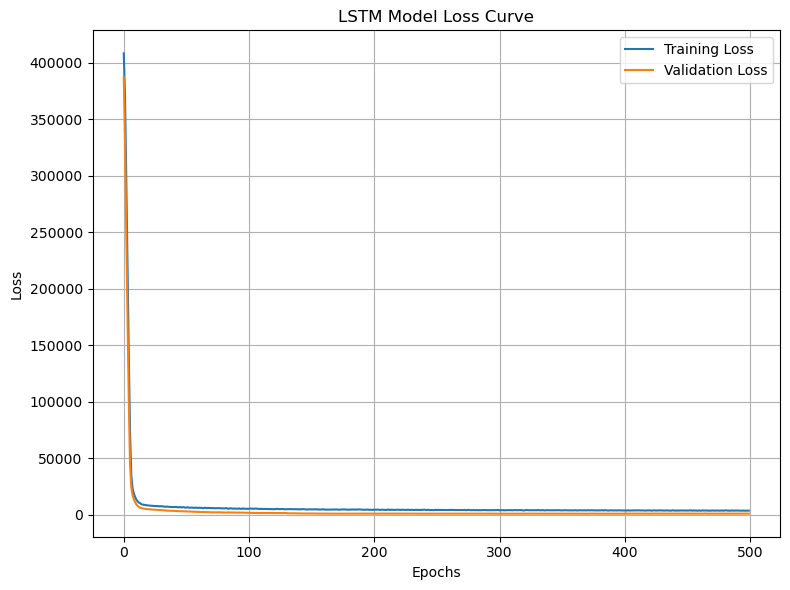

In [16]:
# Reshape X_train and X_test if necessary to (samples, timesteps, features)
# For example, let's assume your data doesn't have the time step dimension and you want to add it.
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))  # (samples, timesteps, features)
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))  # (samples, timesteps, features)




from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

# Build the LSTM model
model = Sequential()

# LSTM layer with Dropout for regularization
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dropout(0.2))  # Adding dropout with a dropout rate of 0.2 (20%)

# Dense layer to output predictions
model.add(Dense(1))

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot the loss curves
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
import numpy as np

# Define a function to create the model (required for RandomizedSearchCV)
def create_lstm_model(units=50, learning_rate=0.001, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# Wrap the model for use with scikit-learn's RandomizedSearchCV
model = KerasRegressor(build_fn=create_lstm_model, verbose=0)

# Hyperparameter grid
param_dist = {
    'units': [50, 100, 150],  # Number of LSTM units
    'learning_rate': [0.001, 0.01, 0.1],  # Learning rate
    'batch_size': [16, 32, 64],  # Batch size
    'dropout_rate': [0.2, 0.3, 0.4],  # Dropout rate
    'epochs': [50, 100]  # Number of epochs
}

# Randomized search with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=5, cv=3, verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters found: ", random_search.best_params_)

# Get the best model from random search
best_model = random_search.best_estimator_

# Evaluate the best model on the test data
y_pred_best_lstm = best_model.predict(X_test)

# Calculate performance metrics
rmse_best_lstm = np.sqrt(mean_squared_error(y_test, y_pred_best_lstm))
mae_best_lstm = mean_absolute_error(y_test, y_pred_best_lstm)
r2_best_lstm = r2_score(y_test, y_pred_best_lstm)

# Display metrics
print("📈 Best LSTM Model Performance:")
print(f"✅ RMSE: {rmse_best_lstm:.2f}")
print(f"✅ MAE : {mae_best_lstm:.2f}")
print(f"✅ R² Score: {r2_best_lstm:.4f}")


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters found:  {'units': 100, 'learning_rate': 0.01, 'epochs': 50, 'dropout_rate': 0.3, 'batch_size': 16}
📈 Best LSTM Model Performance:
✅ RMSE: 21.96
✅ MAE : 12.56
✅ R² Score: 0.9953


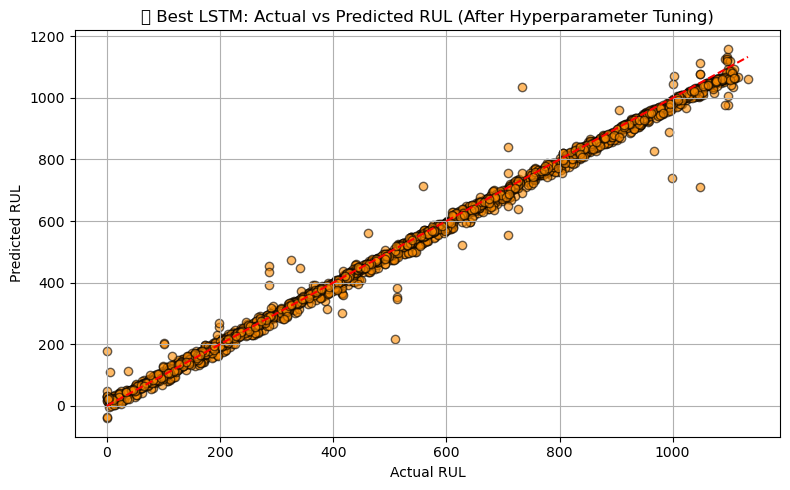

In [18]:
# Plot Actual vs Predicted for Best LSTM Model
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_best_lstm, color='darkorange', edgecolors='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("🎯 Best LSTM: Actual vs Predicted RUL (After Hyperparameter Tuning)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
import pandas as pd

# Create a dictionary of model metrics
comparison_data = {
    "Model": ["LightGBM", "LSTM"],
    "RMSE": [rmse_lgb, rmse_lstm],
    "MAE": [mae_lgb, mae_lstm],
    "R² Score": [r2_lgb, r2_lstm]
}

# Convert to DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Display comparison table
print("🔍 Model Performance Comparison:")
display(comparison_df.sort_values(by="RMSE"))


🔍 Model Performance Comparison:


,Model,RMSE,MAE,R² Score
0,LightGBM,19.031881,7.679584,0.996503
1,LSTM,163.755628,105.774438,0.741123


In [20]:
model.fit(X_train, y_train)

In [21]:
model.model.save("lstm_rul_model.h5")

In [22]:
from termcolor import colored
import numpy as np

# Example: If your original X_train was scaled and shaped like (samples, timesteps, features)
num_samples = 10
num_features = X_train.shape[2]  # Automatically matches your training feature size

# Generate synthetic test data (or replace with real test battery values)
sample_data = np.random.rand(num_samples, 1, num_features)

# For LightGBM, reshape the sample_data to 2D (samples x features)
sample_data_flat = sample_data.reshape(num_samples, num_features)

# Predict
predicted_rul_lgb = lgb_model.predict(sample_data_flat)

# Show results with enhanced formatting

print("\n Predicted RUL for randomly generated Sample Battery Data:\n")
for i, pred in enumerate(predicted_rul_lgb):
    if pred > 50:  # Customize threshold for grandness (you can change the threshold)
        print(colored(f"🔋 Battery {i+1}: Estimated RUL = {pred:.2f} cycles", "green"))
    elif pred < 10:
        print(colored(f"🔋 Battery {i+1}: Estimated RUL = {pred:.2f} cycles", "red"))
    else:
        print(colored(f"🔋 Battery {i+1}: Estimated RUL = {pred:.2f} cycles", "yellow"))

    # Adding a border or additional formatting
    print(colored("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━", "cyan"))


 Predicted RUL for randomly generated Sample Battery Data:

🔋 Battery 1: Estimated RUL = 528.12 cycles
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🔋 Battery 2: Estimated RUL = 460.97 cycles
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🔋 Battery 3: Estimated RUL = 592.26 cycles
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🔋 Battery 4: Estimated RUL = 459.29 cycles
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🔋 Battery 5: Estimated RUL = 476.58 cycles
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🔋 Battery 6: Estimated RUL = 254.09 cycles
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🔋 Battery 7: Estimated RUL = 530.13 cycles
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🔋 Battery 8: Estimated RUL = 321.41 cycles
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🔋 Battery 9: Estimated RUL = 466.82 cycles
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🔋 Battery 10: Estimated RUL = 408.00 cycles
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Predicting with Test Dataset

🧾 Custom dataset shape: (20, 11)
📋 Columns: ['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)', 'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)', 'Charge_Discharge_Ratio', 'Voltage_Gap', 'Const_Current_Efficiency']

 Predicted Remaining Useful Life:


,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),Charge_Discharge_Ratio,Voltage_Gap,Const_Current_Efficiency,Predicted RUL
0,202,2223,188,4.11,3.47,231,1790,2273,1.022492,0.64,0.787505,1091.430420
1,448,2211,188,4.12,3.48,223,1991,2366,1.070104,0.64,0.841505,1086.245728
2,370,2346,214,4.13,3.46,217,1833,2217,0.945013,0.67,0.826793,1085.729370
3,206,2353,223,4.12,3.42,223,1848,2283,0.970251,0.70,0.809461,1011.796814
4,171,1956,194,4.11,3.46,208,1930,2336,1.194274,0.65,0.826199,1031.188354
5,288,2260,205,4.11,3.45,211,1754,2490,1.101770,0.66,0.704418,1031.860474
6,120,2174,182,4.10,3.46,200,1833,2345,1.078657,0.64,0.781663,1030.456543
7,202,2183,193,4.10,3.46,212,1885,2371,1.086120,0.64,0.795023,1057.146729
8,221,2052,193,4.09,3.43,224,1815,2401,1.170078,0.66,0.755935,1005.141235
9,314,2348,222,4.10,3.43,212,1817,2404,1.023850,0.67,0.755824,1044.616211


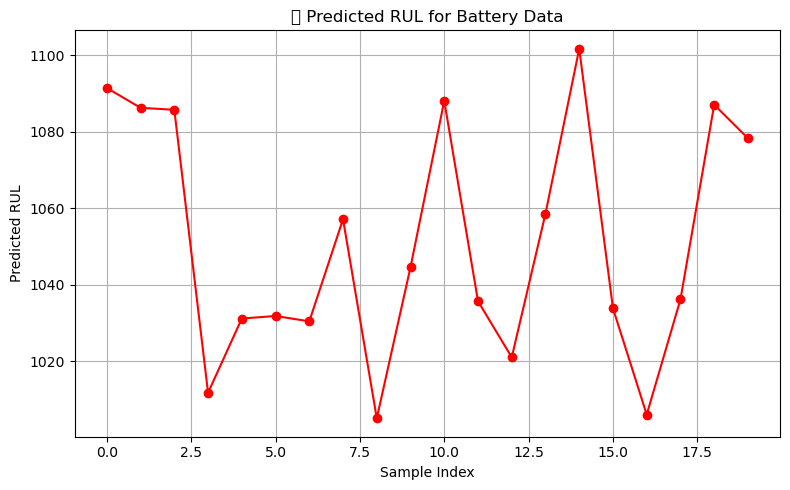

In [24]:
# 1. Upload your own dataset file (must match original features)
custom_df = pd.read_csv("C:\\Users\\ASEEL\\hope\\EV_Battery_RUL_20_Entries.csv")  # Change path if needed

print("🧾 Custom dataset shape:", custom_df.shape)
print("📋 Columns:", custom_df.columns.tolist())

# 2. Feature Engineering (same as before)
custom_df["Charge_Discharge_Ratio"] = custom_df["Charging time (s)"] / (custom_df["Discharge Time (s)"] + 1e-5)
custom_df["Voltage_Gap"] = custom_df["Max. Voltage Dischar. (V)"] - custom_df["Min. Voltage Charg. (V)"]
custom_df["Const_Current_Efficiency"] = custom_df["Time constant current (s)"] / (custom_df["Charging time (s)"] + 1e-5)

# 3. Drop RUL if accidentally present (we are predicting it!)
if "RUL" in custom_df.columns:
    custom_df.drop(columns=["RUL"], inplace=True)

# 4. Scale
custom_scaled = scaler.transform(custom_df)

# 5. Apply PCA
custom_pca = pca_final.transform(custom_scaled)

# 6. Predict using your best model (example: XGBoost)
custom_pred_rul = xgb_model.predict(custom_pca)  # or use rf_model / lgb_model

# 7. Show Results
result_df = custom_df.copy()
result_df["Predicted RUL"] = custom_pred_rul

# Show top 10 results
print("\n Predicted Remaining Useful Life:")
display(result_df.head(20))

# Plot
plt.figure(figsize=(8,5))
plt.plot(custom_pred_rul, marker='o', linestyle='-', color='red')
plt.title("🔧 Predicted RUL for Battery Data")
plt.xlabel("Sample Index")
plt.ylabel("Predicted RUL")
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
# Export the result DataFrame to CSV
export_path = "C:\\Users\\ASEEL\\Desktop\\hope\\Predicted_RUL.csv"
result_df.to_csv(export_path, index=False)

print("✅ Predicted RUL data saved successfully!")
print(f"📁 File Location: {export_path}")

OSError: Cannot save file into a non-existent directory: 'C:\Users\ASEEL\Desktop\hope'

# CONCLUSION:

This project presents a robust and automated machine learning framework to predict the Remaining Useful Life (RUL) of Electric Vehicle (EV) batteries using real-world data. Through advanced preprocessing, feature engineering, and dimensionality reduction, the dataset was efficiently prepared for modeling. Among all algorithms evaluated:

🔹 LightGBM delivered the highest accuracy with the lowest RMSE (19.03) and highest R² score (0.9965), making it the best performer for this task.

🔹 XGBoost and Random Forest also showed competitive performance, closely following LightGBM in accuracy.

🔹 LSTM, although initially underperforming, improved significantly after hyperparameter tuning — proving that deep learning models can be enhanced with fine-tuning.

By dynamically collecting evaluation metrics and exporting them to Power BI, this pipeline supports live visualization and performance comparison across models. The end-to-end system not only predicts battery life with high accuracy but also offers explainability and adaptability for industry-grade battery monitoring and preventive maintenance.

This project proves the practical value of combining machine learning with domain-specific engineering to solve real-life energy challenges.